### Function: `get_bids(attributes, tasks, num_epochs=100)`

This function implements a bidding process using a neural network model to train agents (or robots) on task allocation based on their attributes. The core idea is to learn how to bid for tasks over multiple epochs and update the bidding model based on rewards and task utility feedback.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

from other import *

np.random.seed(1024)

In [3]:
def get_bids(attributes, tasks, num_epochs=100):
    R, T, A = attributes.shape
    reward_vec = get_rewards(tasks)

    # initialize model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(A,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    for _ in range(num_epochs):
        # get bids based on model
        bids = np.zeros((R, T))
        for r in range(R):
            for t in range(T):
                a_input = attributes[r, t].reshape(1, A) # added .reshape(1, A)
                # bids[r, t] = model.predict(a_input.reshape(1, -1), verbose=0)
                bids[r, t] = max(0, model.predict(a_input, verbose=0))

        # send bids to allocation function
        allocations = get_allocations(bids, reward_vec) # dictionary with keys 0...r-1 and values are tuples (task, utility)
        print(allocations)

        # update model based on those utilities
        for r in range(R):
            utility = allocations[r][1].reshape(1, 1)
            task = allocations[r][0]
            input = attributes[r, task].reshape(1, A)
            model.fit(input, utility, verbose=0)
    print(bids)
    return model, allocations



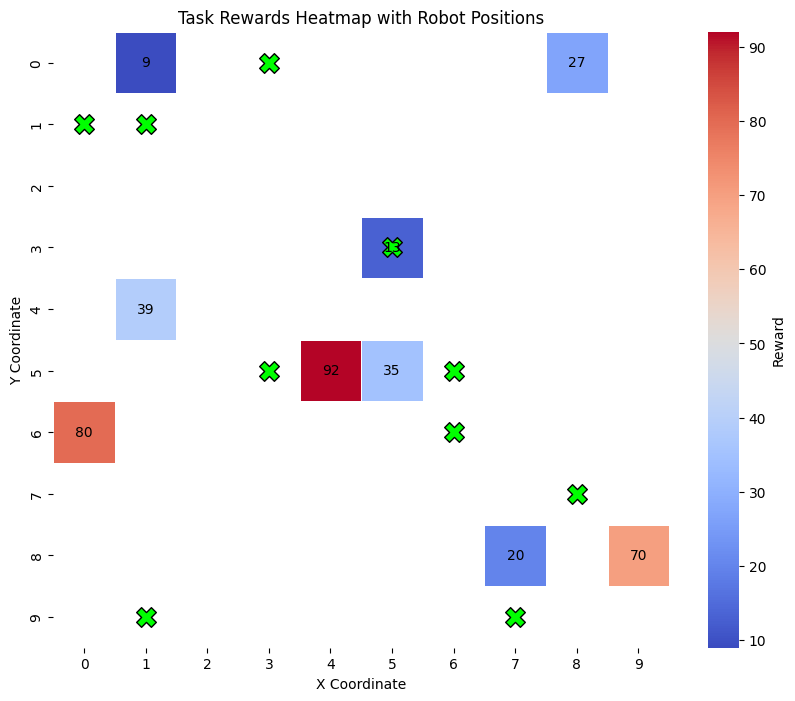

/Users/devg/robopt/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/var/folders/9r/sw7rn4810sjddctl8q8nlcy80000gn/T/ipykernel_57970/1646663670.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bids[r, t] = max(0, model.predict(a_input, verbose=0))


{0: (1, 8.96770516782999), 1: (3, 80.0), 2: (4, 70.0), 3: (5, 39.0), 4: (0, 94.0), 5: (2, 13.0), 6: (6, 92.0), 7: (7, 27.0), 8: (9, 35.0), 9: (8, 20.0)}
{0: (5, 38.79853902757168), 1: (3, 79.87088677287102), 2: (2, 12.771833181381226), 3: (8, 19.85559555888176), 4: (4, 69.76633395254612), 5: (7, 26.8164049834013), 6: (9, 34.69761475920677), 7: (0, 93.76820632815361), 8: (6, 91.69010266661644), 9: (1, 8.657230347394943)}
{0: (0, 92.7450680732727), 1: (7, 25.872853994369507), 2: (8, 19.075143218040466), 3: (3, 78.95971989631653), 4: (1, 7.741864323616028), 5: (6, 91.35786283016205), 6: (2, 12.30297863483429), 7: (9, 34.43230825662613), 8: (5, 38.13204503059387), 9: (4, 68.57677149772644)}
{0: (0, 91.26255178451538), 1: (7, 24.14008855819702), 2: (8, 18.128695607185364), 3: (3, 77.89520835876465), 4: (1, 6.214975595474243), 5: (6, 90.91009831428528), 6: (2, 11.690721869468689), 7: (9, 34.11156380176544), 8: (5, 37.19931709766388), 9: (4, 66.83686351776123)}
{0: (0, 89.58695077896118), 1: 

In [4]:
# vars
grid_size = (10, 10)
num_robots = 10
num_tasks = 10
epochs = 100

# init
robots = init_robots(num_robots, grid_size)
tasks = init_tasks(num_tasks, grid_size)
visualize(robots, tasks, grid_size)

# learning
attributes = create_robot_task_matrix(robots, tasks)
model, allocations = get_bids(attributes, tasks, num_epochs=epochs)

In [5]:
print(get_rewards(tasks))

[94, 9, 13, 80, 70, 39, 92, 27, 20, 35]
